### Introduction

We will start with Generic Graph search. Graph Search is an algorithm where, given a graph, G(V, E), with a starting vertex s $\in$ V, we identify all vertices of G reachable from s


The generic graph search algorithm does the following, with the input grapg G = (V, E) and start vertex s

```
mark s as explored and all other vertices as unexplored

while there is an edge (v, w) in E where v is explored and w is not explored:
    mark w as explored

```

---

The above algorithm is very abstract and the strategy to pick the edge is not specified. In the above algorithm, the vertex v is in the frontier and we wish to find all edges with one vertex in frontier and other outside. Two strategies that we can look at are 

- For all vertices in the frontier, explore all edges that go from them to vertices outside the frontier
- Another strategy would be 
    - Pick one vertex in the frontier
    - Pick one edge from the this vertex to another vertex not in frontier
    - Add this another vertex to the frontier and aggressively keep adding the vertices in the frontier before looking at another vertex, unlike the first strategy
    
These two approches are BFS(Breadth First Search) and DFS (Depth First Search) algorothms for graph exploration. While they both work for finding all possible vertices reachable from a starting vertex s in time $\theta(m + n)$, for some use cases we choose one over another.

For example, for computing the shortst distance to a vertex from a starting vertex s can be done only using BFS efficiently. Where as some use cases like finding strongly connected components in case of directed graphs, we need DFS.



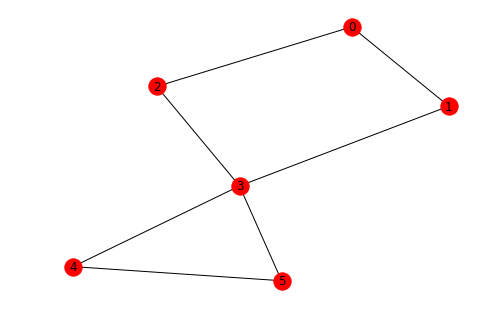

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#A = np.matrix([[0, 1, 1, 0, 0, 0], 
#               [1, 0, 0, 1, 0, 0],
#               [1, 0, 0, 1, 0, 0],
#               [0, 1, 1, 0, 1, 1],               
#               [0, 0, 0, 1, 0, 1],
#               [0, 0, 0, 1, 1, 0],               
#              ])
#G = nx.from_numpy_matrix(A)

G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()


Consider the above graph, starting from vertex 0 which is at level 0, vertices 1 and 2 are at level 1, vertex 3 at level 2 and vertices 4 and 5 at level 3.

BFS will discover these edges in this very order. 

Following Python code makes use of queues and implements BFS and also give is the level of each of the vertex from a provided starting vertex. We saw how addacency lists can be defined in Python in previous notebook, to avoid copying over the code, we will make use of the graph defined in above cell from python package ``networkx`` version 2.2 to get adjacent edges of a given vertex. 

In [2]:
adjacency_dict = {v: [m for m in k] for v, k in G.adjacency()}
adjacency_dict

{0: [1, 2], 1: [0, 3], 2: [0, 3], 3: [2, 1, 4, 5], 4: [3, 5], 5: [3, 4]}


If we look at the above dictionary, the key of the dictionary is the vertex and the value is  the list of edges connected to it. With this dictionary, let us use bfs to find the level of vertices starting with vertex 0 as the starting vertex and see of we get the levels we expect.


In [3]:
def bfs(adg_dict, start_vertex):
    from queue import Queue
    import math
    
    #1. Create queue, we will add tuple of the vertex and level
    q = Queue()
    
    #2. Initialize all levels to infinite. Any vertex not reachable from start_vertex will stay infinite
    levels = [math.inf] * (len(adg_dict.keys()) + 1)
    
    #3. Set of explored vertices
    explored = set()
    
    #4. Start by putting the start_vertex as level 0
    q.put((start_vertex, 0))
    
    #5. Mark, start vertex as explored
    explored.add(start_vertex)
    
    #6. Iterate till we have no more elements in the queue
    while not q.empty():
        #7. Get the vertex and its level (stored as tuple) from head of the queue
        vertex, level = q.get()
        
        #8. Store the level of the vertex in the list (remember, we will never visit the vertex more than once)
        levels[vertex] = level
        
        #9. Get adjacent vertices of this vertex
        for v in adg_dict[vertex]:
            
            #10. Mark them as explored, we dont want to add them to queue if we come across this vertex again
            if v not in explored:                
                explored.add(v)
                
                #11. The level of this vertex is one more than the one we used to get this vertex
                q.put((v, level + 1))

    #12. Once the queue is empty, all vertices reachable from the start are explored, return the list with 
    #the levels of the vertices
    return levels
    
levels = bfs(adjacency_dict, 0)
for v, l in zip(adjacency_dict.keys(), levels):
    print('Node %d is at level %d'%(v, l))

Node 0 is at level 0
Node 1 is at level 1
Node 2 is at level 1
Node 3 is at level 2
Node 4 is at level 3
Node 5 is at level 3


This is what we expected to get. 

---

*** Quiz 8.1. ***

For a graph with minimum 2 edges, the minimum number of layers is 2, irrespective of the number of edges. The maximum is n, which can be formed by forming a chain of vertices like a linked list. So the answer will be (d), 2 and n levels

---

#### Connected components.

Lets look at an examples below

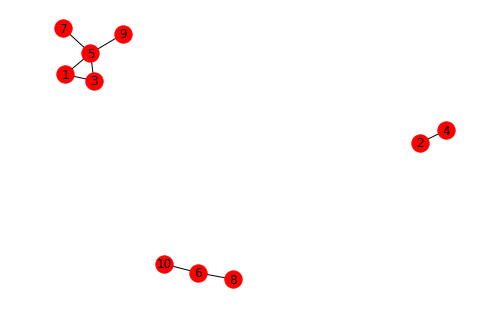

In [4]:
G = nx.Graph()
G.add_edges_from([(1, 3), (1, 5), (3, 5), (5, 9), (5, 7), (2, 4), (6, 8), (6, 10)])
nx.draw(G, with_labels = True)
plt.show()

As we see above, we have three connected components made of vertices {1, 3, 5, 7, 9}, {2, 4} and {6, 8, 10}

These three mentioned above are the connected components of the **undirected graph** above. In general for a set X, if x, y $\in$ X, then we write x ~ y if x is related to y. 

For our graph, the set of the ser of vertices V. We write v ~ w if there is an edge between the vertices v and w.
The equivalence relation has to satisfy the following three properties

- The relations are reflexive, which means x ~ x. In our graph each vertex if related to itself.
- The relation is symmetric, which means if x ~ y then y ~ x. In case of undirected graph, this is true as, if there is an edge between w and v there is also an edge between v and w
- The relation is transitive. Which means if x ~ y and y ~ z then x ~ z. In case of our graph, if we can reach from vertex x to y and we can reach from y to z, then we can reach from x to z.

The equivalence relations partitions the set into some sub sets. Each element in a class is related to each other element in that class and only to elements in that class. 

In case of graph these classes are connected components.

---

*** Quiz 8.2 ***

With n vertices and m edges, in the worst case we have 0 edges and therefore each vertex is forms one connected component. Thus the maximum numbers of Undirected Connected Components (UCC) we can have is n

On other hand, each vertex can reach any other vertex in the graph giving us just one connected component. Thus the answer is (b), 1 and n


---

We will next implement the UCC algorithm using the bfs we already have implemented. The goal of this algorithm is to tell us the number of strongly connected components in a graph (and the vertices in those components.)

In [5]:
def ucc(adj_dict):
    #1. Maintain a set of of unexplored nodes.    
    explored = set()
    ucc_id = 1
    import math
    uccs = {}
    #2. Iterate through all unexplored vertices
    for v in adj_dict.keys():
        
        if v in explored:
            #3a. If vertex is explored, its already part of some connected component, skip it
            continue
        else:
            #3b. Invoke bfs we already implemented. All vertices not reachable will have distance inf
            distances = bfs(adj_dict, v)
            #4. Filter out all vertices with infinite distances, 
            #those are the vertices not in the current connected component
            vertices = [v for v, dist in enumerate(distances) if dist is not math.inf]
            
            #5. Add all vertices in current component to the set, to prevent further exploration of these vertices
            explored.update(vertices)
            
            #6. Store the uccs as 1, 2, 3, 4,....
            uccs[ucc_id] = vertices
            ucc_id += 1
    
    return uccs
    
adj_dict = {v: [m for m in k] for v, k in G.adjacency()}
uccs = ucc(adj_dict)
print('Number of connected components are %d\n'%len(uccs))
for ucc_id in uccs:
    print('Connected component', ucc_id, 'has vertices', uccs[ucc_id])

Number of connected components are 3

Connected component 1 has vertices [1, 3, 5, 7, 9]
Connected component 2 has vertices [2, 4]
Connected component 3 has vertices [6, 8, 10]



The result we see above is exactly what we expected.

---

Lets look at the running time of this algorithm.

For BFS, the algorithm never processes a vertex more than once and thus one component of the complexity if linear in terms of the number of vertices n. If it processes a vertex, it will iterate over each edge of the graph which involves this vertex. Since each vertex if processed only once and each time we process all edges of that vertex, the complexity if also linear in the number of edges in that graph and thus the time complxity is $O(m + n)$

For the connected components (UCC) algorithm, we do a linear scan on all vertices and invoke BFS from a vertex only if it does not yet belong to a UCC, Thus for a connected component *i*, the complexity if $\theta(m_i + n_i)$

The total complexity therefore is $\theta(\sum_i{m_i} + \sum_i{n_i})$

The ucc algoritm discovers all the vertices across all the connected components and by definition of ucc, one vertex belongs to only one connected component. Therefore $\sum{n_i}$ will be same as the total vertices in the graph(s). Similarly, the edges in the connected components belong entirely to the vertices within that connected component and thus $\sum{m_i}$ is same as the number of edges in the graph and therefore the complexity of ucc is $\theta(m + n)$


#### Depth First Search (DFS)

We will now look at another graph traversal algorithm, DFS.

Below, is a recursive implementation of DFS. We will define the same graph used for BFS and do a DFS traversal. First, lets take a look at the graph again



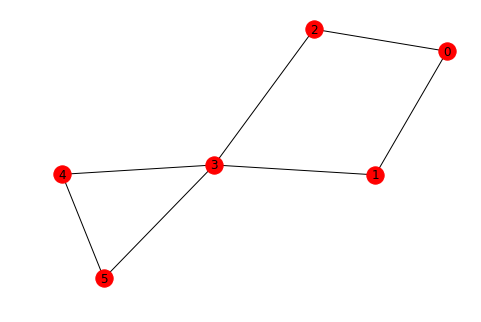

In [6]:
G = nx.Graph()
edges = [(0, 1), (0, 2), (2, 3), (1, 3), (3, 4), (3, 5), (4, 5)]
G.add_edges_from(edges)
nx.draw(G, with_labels = True)
plt.show()

Now, with DFS, we will print out the order in which we iterate through the vertices of the graph

In [7]:
def dfs(adj_dict, start_vertex):
    visited = set()
    order = list()
    def dfs_(current_vertex):
        if current_vertex not in visited:
            visited.add(current_vertex)
            order.append(current_vertex)
            
            for adjacent_vertex in adj_dict[current_vertex]:
                dfs_(adjacent_vertex)
            
        
    dfs_(start_vertex)
    return order
    
    
adj_dict = {v: [m for m in k] for v, k in G.adjacency()}
dfs(adj_dict, 0)

[0, 1, 3, 2, 4, 5]


The above result shows us how the traversal went from 0 -> 1 and then 1 -> 3 and finally 3 traversing all its adjacent vertices including 2 (which is also adjacent to 0). This is now how BFS worked and it would be visited 1 and 2 before it visited 3.

For running time, its similar to BFS, each vertex is visited only once and we travse all edges from the vertex currently processed. Therefore the running time is $\theta(m + n)$


#### Topological Sort

We will now look at an application of DFS, which is topological sort. 

Topological ordering of a graph G = (V, E) is assignment $f(v)$ to every vertex v $\in$ V such that for every edge (v, w) $\in$ E, $f(v) < f(w)$

Topological ordering is useful when we want to sequence tasks when precence constraints are respected.

---

*** Quiz 8.3 ***

For the Given graph 2 topological orderings are possible.

---


Topological ordering is not possible when we have directed cycles or cyclic dependencies in a graph. A graph with no directed cycles are called *Directed Acyclic Graph (DAG) *

*TODO: Give notes on the proof that DAG has at least one topological ordering*

---

##### Topological ordering using DFS

We will now see how we can do Topological ordering using DFS, First, we will plot look at the graph which we will use for computing the topological ordering


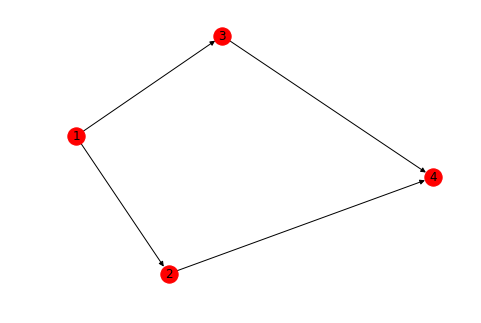

In [8]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (3, 4), (2, 4)])
nx.draw(G, with_labels = True)
plt.show()


The above graph has one source vertex, 1 and 1 sink vertex 4. Lets use DFS to find to find the topological ordering of the graph.


In [9]:
def topoSort(graph):
    
    currLabel = len(graph.nodes)
    labels = [0] * currLabel
    explored = set()
    
    def dfs(vertex): 
        nonlocal currLabel
        out_edges = graph.out_edges(vertex)
        for _, to in out_edges:
            if to not in explored:
                explored.add(to)
                dfs(to)
        
        labels[vertex - 1] = currLabel
        currLabel -= 1

    source_vertices = filter(lambda e: len(G.in_edges(e)) == 0, G.nodes)
    for s in source_vertices:
        dfs(s)

    return labels
    
order = topoSort(G)   

print('Topological ordering for the graph is', order)

Topological ordering for the graph is [1, 3, 2, 4]



The ordering looks ok and gave us one of the possible valid orderings, now let is try it out on a vertex with two source vertices and see how it works

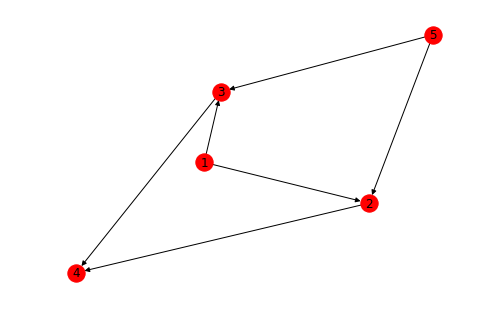

In [10]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (1, 3), (3, 4), (2, 4), (5, 2), (5, 3)])
nx.draw(G, with_labels = True)
plt.show()

In [11]:
order = topoSort(G)   

print('Topological ordering for the graph with vertices [1, 2, 3, 4, 5] is', order)

Topological ordering for the graph with vertices [1, 2, 3, 4, 5] is [2, 4, 3, 5, 1]


 To See how the topological ordering on a cyclic graph behaves, let us look at the following

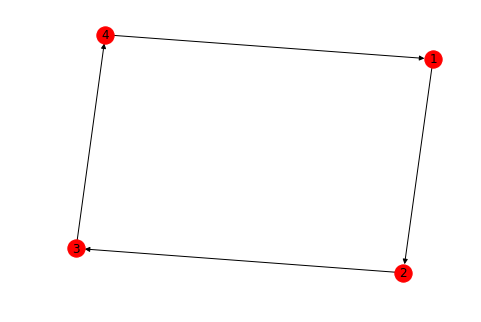

Topological ordering for the graph with vertices [1, 2, 3, 4] is [0, 0, 0, 0]


In [12]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
nx.draw(G, with_labels = True)
plt.show()
order = topoSort(G)   

print('Topological ordering for the graph with vertices [1, 2, 3, 4] is', order)


---

***Quiz 8.4***

As we see in the above case, the topological ordering never completes successfully, but the program terminates. Thus the answer id (d)

---

##### Computing Strongly connected components

Strongly connected component of a directed graph G with vertices V is a maximal set of S $\subseteq$ V, such that we can travese from any given vertex to any other vertex in these set of vertices.

Consider the following graph



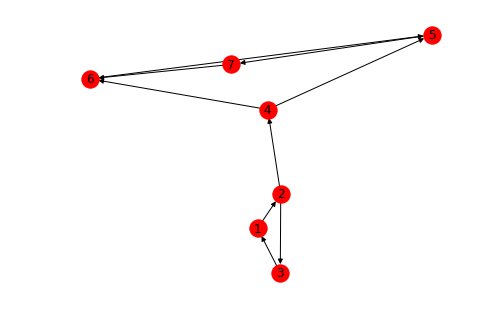

In [13]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (4, 6), (5, 7), (7, 6), (6, 5)])
nx.draw(G, with_labels = True)
plt.show()


From the above graph, we can see that we can have a set of vertices {1, 2, 3}, {4}, {5, 6, 7} as three maximal set of vertices of the directed graph with vertices {1, 2, 3, 4, 5, 6, 7}, where, for any given maximal subset, we can find a path from any vertex to any other vertex in the subset. 

Computing the strongly connected components for a directed graph is not as straight forward as the `UCC` algorithm we saw earlier

The following directed graph too has three strongly connected, components. With each SCC as a vertex in the graph

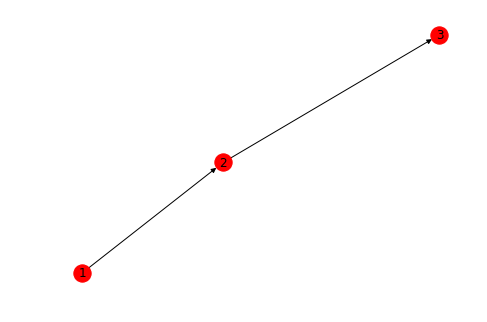

In [14]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3)])
nx.draw(G, with_labels = True)
plt.show()

The relations betweem vertices in the above graph and the one before that is same. If we look closely, each vertex in the above graph can be replaced with an SCC with larger number of vertices.

The graph above can be viewed as the zoomed out relations between the SCCs in the graph with 7 vertices we saw earlier.

---
*** Quiz 8.5 ***

For a Directed **Acyclic** Graph, since there are no cycles, it is not possible to go from one vertex to another vertex and thus we are left with minimum and maximum number of SCCs as the number of vertices in the graph n, where each SCC is one vertex.

The answer is therefore **d**, **n and n**

---

Lets consider the below graph again and we initiate a DFS on it from two vertices in it

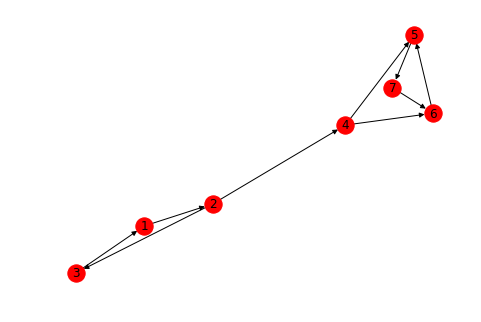

In [15]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (4, 6), (5, 7), (7, 6), (6, 5)])
nx.draw(G, with_labels = True)
plt.show()


In [16]:
adj_dict = {v: [m for m in k] for v, k in G.adjacency()}
dfs6 = dfs(adj_dict, 6)
dfs1 = dfs(adj_dict, 1)
print('DFS from vertex 6 gives us', dfs6)
print('DFS from vertex 1 gives us', dfs1)

DFS from vertex 6 gives us [6, 5, 7]
DFS from vertex 1 gives us [1, 2, 3, 4, 5, 7, 6]



As we see above, the DFS from vertex 6 seems to have given us one of the strongly connected component but a DFS from 1 gives us the entire graph.

It seems like we do require DFS to uncover these SCCs in a graph but the order of invoking DFS on the vertices is very important to prevent traversal of entire graph while doing DFS. In above case, starting from any of the vertex in the SCC {5, 6, 7} will work as it is SCC, that is, there is no outgoing edge from this SCC to any other SCC.

We will look at Kosaraju's Algorithm to find SCC in a directed graph.

We will look at the following Theorem first which says

If G is a graph with vertices ordered aribtrarily, then for each v $\in$ V, f(v) denotes the position of the vertex v computed using the topological sort.

Suppose we have two SCC's of G, $S_1$ and $S_2$, then, suppose we have an edge (v, w) with v $\in$ $S_1$ and w $\in$ $S_2$, then $min_{x \in S_1}\:f(x) < min_{y \in S_1}\:f(y)$


We have the following two case.

The Topo Sort picks aa vertex in SCC S1. In which case, after we initiate DFS from S1, There will be at least one vertex v which connects to a vertex in S2. Given the recursive nature of the call, once the traversal reaches one one of the vertices of S2, we will discover all vertices of S2 by definition of SCC where we can reach all vertices from any vertex in an SCC. In this case, there will be atleast one vertex in SCC $S_1$ which will have $f(v)$ < the minimimum f value of vertices in S2

The second case is when we start Topo Sort from a vertex in S2. In this case, we cannot reach any vertex in S1 which mean, the $f(v)$ for all vertices in S2 is > all vertices in S1, which is even stronger than our assumption

$min_{x \in S_1}\:f(x) < min_{y \in S_1}\:f(y)$


---

*** Quiz 8.6 ***

If G is the directed graph $G$ and the reversed graph is $G^{rev}$, then the following two hold true

- Every SCCs in $G$ is also an SCC $G^{rev}$
- Every Sink SCC in $G$ becomes source SCC in $G^{rev}$ 

Thus the answer is **(b)** and **(d)**

---

Continuing with te theorem we saw, above, the vertex with the highest value of f(v), lies in the sink SCC and is a perfect candidate for the second DFS to discover the SCCs in the directed graph.

Lets implement Kosaraju's algorithm 

In [17]:
def kosarajuSCC(g):    
    #g is a Directed Graph
    #Returning a graph only for plotting
    def reverse():
        adj_list = [(k, [t for t in v]) for k, v in g.adjacency()]
        #TODO: If performance is a problem prepare adj list without creating the rev DiGraph
        rev = nx.DiGraph()
        rev.add_edges_from([(e, s) for s, t in adj_list for e in t])        
        return rev, {k: [t for t in v] for k, v in rev.adjacency()}
    
    #1. Reverse the graph
    rev, rev_adj_list = reverse()

    numVertices = len(rev.nodes)
    curr = numVertices
    visited = set()
    
    #Non recursive implementation of DFS, 
    #With recursive approach the challenge problem gives 
    #segmentation error for running out of stack
    def dfs(adj_list, start):
        stk = [start]        
        scc = []
        while len(stk) > 0:
            top = stk.pop()             
            if top in visited:                
                continue
            else:
                visited.add(top)
                scc.append(top)
                stk.extend(adj_list[top])
                
        return scc
    
    
    #2. Invoke TopoSort on the reversed graph giving each vertex a rank, f(v).    
    f = [0] * (numVertices + 1)
    for i in range(1, numVertices + 1):
        if f[i] == 0:
            nodes = dfs(rev_adj_list, i)
            for n in reversed(nodes):
                f[n] = curr
                curr -= 1
    
    #print(f)
    #3. Sort by reverse order of f value and invoke DFS starting from that vertex.
    order = { f[i] : i for i in range(1, numVertices + 1)}
    #print(order)
    visited = set()
    
    adj_list = {k: [t for t in v] for k, v in g.adjacency()}
    sccs = []
    for o in range(1, numVertices + 1):
        if order[o] not in visited:
            scc = dfs(adj_list, order[o])            
            sccs.append(scc)
    
    #nx.draw(rev, with_labels = True)
    #plt.show()
    return sccs
    
 


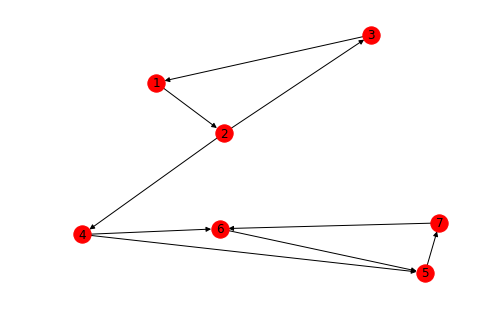

Number of SCCs in the graph are 3
	SCC 1 is [5, 7, 6]
	SCC 2 is [4]
	SCC 3 is [1, 2, 3]


In [18]:
G = nx.DiGraph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (2, 4), (4, 5), (4, 6), (5, 7), (7, 6), (6, 5)])
nx.draw(G, with_labels = True)
plt.show()

sccs = kosarajuSCC(G)
print('Number of SCCs in the graph are', len(sccs))
for i in range(len(sccs)):
    print('\tSCC', (i + 1), 'is', sccs[i])


For the small test graph, the results seems ok. Let us test it against the test cases given [here](http://theory.stanford.edu/~tim/algorithmsilluminated.html) under *Programming Problem 8.10: Computing Strongly Connected Components*

In [19]:
def diGraphFromFile(fileName):
    with open(fileName, 'r') as f:
        lines = f.readlines()
        edges = [list(map(int, s.strip().split())) for s in lines]
        
    
    g = nx.DiGraph()
    g.add_edges_from(edges)
    return g    


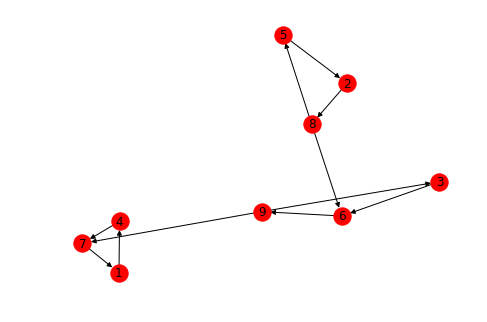

In [36]:
g = diGraphFromFile('problem8.10test1.txt')
sccs = kosarajuSCC(g)
nx.draw(g, with_labels = True)
plt.show()


In [21]:
print('Length of SCCS for problem8.10test1.txt are ', [len(x) for x in sccs])

Length of SCCS for problem8.10test1.txt are  [3, 3, 3]



The above SCCs are expected, let us try out other graphs and see the results

In [22]:
test_files = ['problem8.10test2.txt', 'problem8.10test3.txt', 'problem8.10test4.txt', 'problem8.10test5.txt']

for t in test_files:
    sccs = kosarajuSCC(diGraphFromFile(t))
    print('Length of SCCS for', t, 'are', sorted([len(x) for x in sccs], reverse = True))


Length of SCCS for problem8.10test2.txt are [3, 3, 2]
Length of SCCS for problem8.10test3.txt are [3, 3, 1, 1]
Length of SCCS for problem8.10test4.txt are [7, 1]
Length of SCCS for problem8.10test5.txt are [6, 3, 2, 1]


The following code takes about 50 seconds to run the algorithm and around 40 seconds to read the data from file in memory. Some performance improvement for the algorithm running time can be achieved by not explicitly reversing the graph to create the adjacency list but use the input graph directly. This should also reduce the memory footprint

In [31]:
%%time
g = diGraphFromFile('problem8.10.txt')

CPU times: user 35.8 s, sys: 1.47 s, total: 37.2 s
Wall time: 37.7 s


In [32]:
%%time
import sys
sccs = kosarajuSCC(g)
print('Length of top 5 SCCS for test file are', sorted([len(x) for x in sccs], reverse = True)[0:5])

Length of top 5 SCCS for test file are [434821, 968, 459, 313, 211]
CPU times: user 45.5 s, sys: 2.68 s, total: 48.2 s
Wall time: 48.9 s


As we see above, the top 5 biggest SCCs are of size **434821, 968, 459, 313 ** and **211**

---

#### Test Your Understanding

---

**Problem 8.1 **

All four statements are right, 

* We can use BFS to compute connected components of undirected graph in $\theta(m + n)$
* BFS can be used to find the length of shortedt path from starting vertex to every other vertex in $\theta(m +n)$
* DFS can be used to compute SCC in $\theta(m +n)$, we have seen Kosaraju's algorithm do it
* DFS can be used to compute the topological ordering in $\theta(m +n)$

---

**Problem 8.1 **

In general, given that we can find the adjacent vertices of a vertex in constant time, DFS (or BFS) can run in $\theta(m +n)$. However, an adjacency matrix has a dimension $n^2$ and the complexity to get adjacent vertices of a vertex is $\theta(n)$, thus the overall complexity becomes $\theta(n^2)$.

---

** Problem  8.3 **

From the given 4 conditions, option **(b)** $r \leq d$ is obvious as by definition diameter is maximum of the maximum distances between pair of vertices and radius is minimum of maximum distances between pair of vertices

Let us consider the following 

let diameter d = dist(A, B) and radius r = dist(C, D), 

distance between A and B is the shortest distance, thus we can say 

dist(A, C) + dist(C, B) $\geq$ dist(A, B)

It will be equal only if C falls in the shortest path between A and B.

By definition of radius, it is the minimum of the maximum distances between pair of vertices. Thus, 

if dist(C, D) is the radius, we know no other distance to vertices involving C or D has distance greater than dist(C, D) (else that would have been the radius)

dist(C, D) $\geq$ dist(A, C) (Order of the vertices does not matter as distance between A to C is same as distance between C to A)

and

dist(C, D) $\geq$ dist(C, B)

Therefore, the relation D(A, C) + D(C, B) $\geq$ D(A, B) can be writen as 

dist(C, D) + dist(C, D) $\geq$ D(A, B) $\implies$ 2 * dist(C, D) $\geq$ D(A, B) $\implies$ 2r $\geq$ d $\implies$ r $\geq \frac{d}{2}$ 


And another right option is **(c)**

---

** Problem  8.4 **

The answer to the best of my knowledge is  **(d)** as for all other cases I can come up with some graph that satisfies the given statement but still does not guarantee a unique topological ordering.

- First one is very broad, yes if the graph is directed acyclic we can compute topological ordering but we have seen several cases where the the topological order is not not unique, thus (a) is not an answer
- For graphs with cycles, we cannot compute topological sort, thus (b) is incorrect
- This is tricky, but consider a graph with edges X -> Y and X -> Z, once on X we visit a vertex only once in any given path, but the topological ordering of 1, 2, 3, and 1, 3, 2 for X, Y and Z are all valid. Thus (c) doesn't look to be an answer
- The option (d) is the only option we have

---

** Problem  8.5 **

I quite dont understand the question, specifically the statement *Minimizes the number of edges that travel backward*

---

** Problem  8.6 **

- Option **(a) is correct**, if the new edge is between vertices of same SCC, then there is no change on SCCs. However, consider two SCCs $S$ and $S^\prime$, suppose we have an edge from $S \rightarrow S^\prime$, adding a new edge between a vertex in $S^\prime$ to $S$, will merge $S$ and $S^\prime$ into one SCC.
- Option **(b) is incorrect**, we just saw above how the SCCs can decrease
- Option **(c) is correct**. Adding an edge cannot possibly break an SCC into 2 or more smaller SCCs under any circumstance, thus SCCs cannot increase.
- Option **(d) is correct** as the maximum number of SCCs affected are 2 merged in 1 SCC as we saw in case (a), thus the number SCCs cannot decrease by more than 1

---

** Problem  8.7 **

For Kosaraju's algorithm, we first need to do a topological sort which can only be done using DFS. Therefore, options (a) and (b) are incorrect.

Once the topological ordering is done, we need to explore the connections starting from that vertex to find the SCC. This can be done either by DFS or BFS, hence option (c) is correct and option (d) is wrong.

---

** Problem  8.8 **

(a) is correct. The algorithm does the same thing as we have implemented just reversed the numbering
(b) is correct. SCCs in revrese graph are same as SCCs in original graph. 
(c) is incorrect, the numbering is different in reversed graph as the sink vertices become source and source become sink and thus the topological ordering is different.
(d) is incorrect, same as above this is incorrect.


---
** Problem  8.9 **

TODO:

---

** Problem  8.10 **


Already implemented earlier and all provided test case executed.

---


